*   Author : Dilina Chathuraka Perera
*   Student who contributed to the code peer review: Neth Botheju
*   Date of the review: 11/04/2025

**Ensemble voting classifier for mortality status predictions**



*   Mounting the google drive



In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*   Data manipulation and real-world data analysis in Python
*   From tutorial 1&2 (Week 1), Page 12

In [ ]:
#Importing pandas library
import pandas as pd

#Loading data into a DataFramed
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification_data.csv')


*   Print the rows and columns of the dataset
*   From tutorial 1&2 (week 1), page 13





In [ ]:
#displays the first five rows
df.head()


Age  Tumor_Size  Regional_Node_Examined  Reginol_Node_Positive  \
0  0.974359    0.000000                0.383333               0.000000   
1  0.512821    0.190476                0.216667               0.088889   
2  0.717949    0.457143                0.216667               0.133333   
3  0.717949    0.028571                0.016667               0.000000   
4  0.435897    0.247619                0.033333               0.000000   

   Estrogen_Status  Progesterone_Status  A_Stage   T_Stage  N_Stage  \
0              1.0                  1.0      1.0  0.000000      0.0   
1              1.0                  1.0      1.0  0.333333      0.5   
2              1.0                  1.0      1.0  0.666667      1.0   
3              1.0                  1.0      1.0  0.000000      0.0   
4              1.0                  1.0      1.0  0.333333      0.0   

   6th_Stage  Differentiated     Grade Mortality_Status  
0       0.00        0.333333  0.666667            Alive  
1       0.50        0.000000  0.333333            Alive  
2       1.00        0.000000  0.333333            Alive  
3       0.00        0.333333  0.666667            Alive  
4       0.25        0.333333  0.666667            Alive



*   Prints the summary of the data set that includes the data types of the each columns
*   From tutorial 1&2 (week 1), page 14



In [ ]:
# Use a method to explore the data types for all the variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4020 non-null   float64
 1   Tumor_Size              4020 non-null   float64
 2   Regional_Node_Examined  4020 non-null   float64
 3   Reginol_Node_Positive   4020 non-null   float64
 4   Estrogen_Status         4020 non-null   float64
 5   Progesterone_Status     4020 non-null   float64
 6   A_Stage                 4020 non-null   float64
 7   T_Stage                 4020 non-null   float64
 8   N_Stage                 4020 non-null   float64
 9   6th_Stage               4020 non-null   float64
 10  Differentiated          4020 non-null   float64
 11  Grade                   4020 non-null   float64
 12  Mortality_Status        4020 non-null   object 
dtypes: float64(12), object(1)
memory usage: 408.4+ KB




*   Return the summary
*   From tutorial 4 (Week 4), Page 3



In [ ]:
#Display the basic stats
df.astype('object').describe().transpose()

count unique       top    freq
Age                     4020.0   41.0  0.410256   162.0
Tumor_Size              4020.0   92.0       0.0   952.0
Regional_Node_Examined  4020.0   55.0       0.2   251.0
Reginol_Node_Positive   4020.0   38.0       0.0  1520.0
Estrogen_Status         4020.0    2.0       1.0  3751.0
Progesterone_Status     4020.0    2.0       1.0  3323.0
A_Stage                 4020.0    2.0       1.0  3929.0
T_Stage                 4020.0    4.0  0.333333  1784.0
N_Stage                 4020.0    3.0       0.0  2730.0
6th_Stage               4020.0    5.0       0.0  1304.0
Differentiated          4020.0    4.0       0.0  2349.0
Grade                   4020.0    4.0  0.333333  2349.0
Mortality_Status          4020      2     Alive    3405



*   Renaming categorical values (labels) in variables
*   From tutorial 1 (week 1), page 17



In [ ]:
# Convert 'Alive'/'Dead' to 1/0 in the Mortality_Status column
df['Mortality_Status'] = df['Mortality_Status'].map({'Alive': 1, 'Dead': 0})



*   Define the X inputs and the target y variables
*   From tutorial 7 (week 7), page 3



In [ ]:
# Select features (input variables) for the model
X = df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Estrogen_Status',
        'Progesterone_Status', 'A_Stage', 'T_Stage', 'N_Stage', '6th_Stage',
        'Differentiated', 'Grade']]

# Select target (output variable) we want to predict
y = df['Mortality_Status']





*   Partition the data into a train set and a test set
*   From tutorial 3 (week 3), page 5





In [ ]:
# Import function to split data into training and test sets
from sklearn.model_selection import train_test_split

# Split data: 70% training, 30% testing
# stratify keeps same class ratio in both sets
# random_state ensures same split every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)



*   Building Base learners
*   From tutorial 7 (week 7), page 3



Classification report for GaussianNB
              precision    recall  f1-score   support

           0       0.36      0.43      0.39       185
           1       0.89      0.86      0.88      1021

    accuracy                           0.79      1206
   macro avg       0.62      0.64      0.63      1206
weighted avg       0.81      0.79      0.80      1206


Confusion matrix for GaussianNB


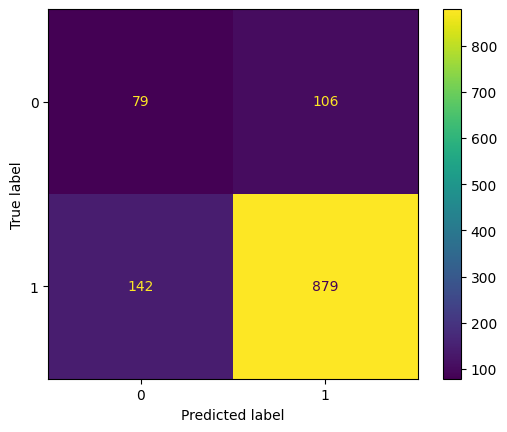

In [ ]:
# Import the GaussianNB algorithm, build the model, and test it
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate the GaussianNB model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification report for GaussianNB")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion matrix for GaussianNB")
nb_cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb.classes_)
disp.plot()




*   Building Base learners
*   From tutorial 7 (week 7), page 3



Classification report for LR
              precision    recall  f1-score   support

           0       0.53      0.10      0.17       185
           1       0.86      0.98      0.92      1021

    accuracy                           0.85      1206
   macro avg       0.69      0.54      0.54      1206
weighted avg       0.81      0.85      0.80      1206

confusion_matrix for lr


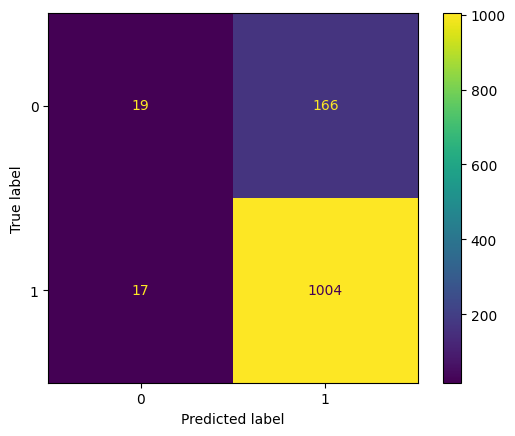

In [ ]:
# import the LR algorithm, build the LR model then test it by predicting on the test data
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

# Evaluate your LR model byt generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for LR")
print(classification_report(y_test,y_pred_lr))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for lr")
lr_cm=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
disp.plot()




*   Building Base learners
*   From tutorial 7 (week 7), page 5

Classification report for DT
              precision    recall  f1-score   support

           0       0.24      0.27      0.26       185
           1       0.86      0.85      0.86      1021

    accuracy                           0.76      1206
   macro avg       0.55      0.56      0.56      1206
weighted avg       0.77      0.76      0.76      1206

confusion_matrix for DT


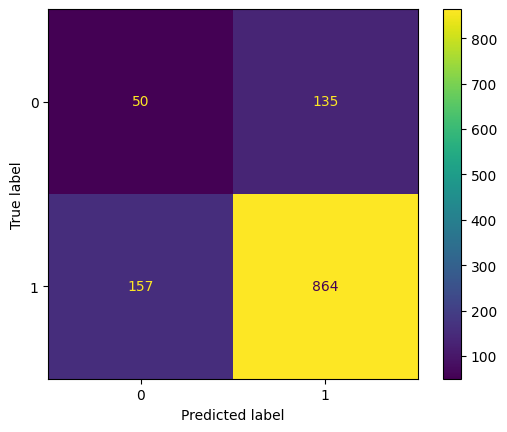

In [ ]:
# import the DT algorithm, build the DT model then test it by predicting on the test data
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

# Evaluate your DT model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for DT")
print(classification_report(y_test,y_pred_dt))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for DT")
dt_cm=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=dt.classes_)
disp.plot()




*   A soft-voting ensemble calculates the average score (or probability) and compares it to a threshold
value.
*   From tutorial 7 (week 7), page 6



Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.36      0.39      0.38       185
           1       0.89      0.88      0.88      1021

    accuracy                           0.80      1206
   macro avg       0.63      0.64      0.63      1206
weighted avg       0.81      0.80      0.80      1206

confusion_matrix for ensember learner


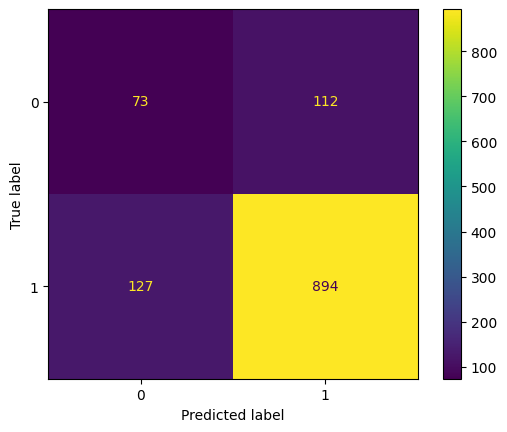

In [ ]:
#initiate a new ensemble model
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('NB', nb), ('LR', lr)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='soft')

#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)

# Evaluate your ensemble model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()




*   The classification metrics report
*   From tutorial 3 (week 3), page 11



In [ ]:
# Import classification report to evaluate model performance
from sklearn.metrics import classification_report

# Print detailed performance metrics (precision, recall, f1-score)
print(classification_report(y_test, y_pred_ensembler))

              precision    recall  f1-score   support

           0       0.36      0.39      0.38       185
           1       0.89      0.88      0.88      1021

    accuracy                           0.80      1206
   macro avg       0.63      0.64      0.63      1206
weighted avg       0.81      0.80      0.80      1206





*   The Receiver Operating Characteristic(ROC) curve is a graphical classification metric plot of the
true positive rate against the false positive rate.
*   From tutorial 3 (week 3), page 11



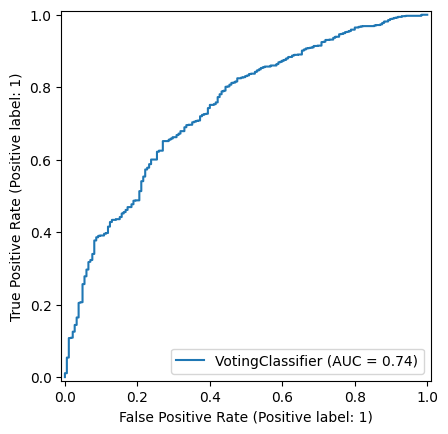

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Display ROC curve for the ensemble model
RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)




*   The classification metrics report
*   From tutorial 3 (week 3), page 11




In [ ]:
from sklearn.metrics import accuracy_score

# Predict mortality status using the ensemble
y_pred_ensemble = ensemble_learner.predict(X_test)

# Calculate and display accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(ensemble_accuracy)

0.8018242122719734


In [ ]:
# Import the classification report tool
from sklearn.metrics import classification_report

# Print model performance metrics (precision, recall, f1-score) for the ensemble predictions
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.36      0.39      0.38       185
           1       0.89      0.88      0.88      1021

    accuracy                           0.80      1206
   macro avg       0.63      0.64      0.63      1206
weighted avg       0.81      0.80      0.80      1206



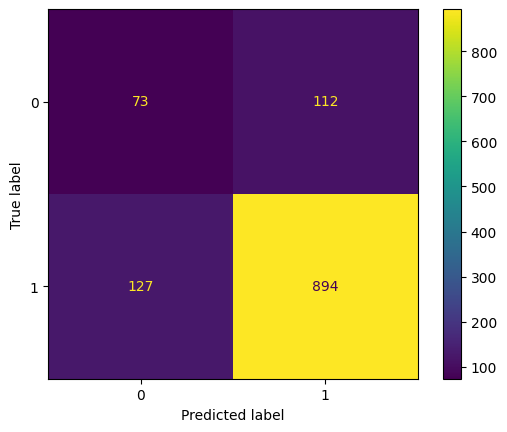

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(ensemble_learner, X_test, y_test)


**Decision Tree regression model for survival months prediction**



*    Import all Python libraries to load, access, prepare and model the  dataset.
*   From tutorial 6 (week 6), page 3



In [ ]:
# To transform your features into new values
from sklearn import preprocessing

# Import train_test_split function
from sklearn.model_selection import train_test_split

# To construct and plot decision trees
from sklearn import tree
from matplotlib import pyplot as plt

# Import Decision Tree Classifier to predict loan approval status
from sklearn.tree import DecisionTreeClassifier

# Import Decision Tree Regressor to predict maximum loan amount
from sklearn.tree import DecisionTreeRegressor

#To optimise the Decision Tree model's hyperparameters
from sklearn.model_selection import GridSearchCV

#Import scikit-learn metrics module for classification and regression performance metrics
from sklearn import metrics

# To create and plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# To produce the classification metrics report
from sklearn.metrics import classification_report

# To create, calculate and plot the RoC curve
from sklearn.metrics import RocCurveDisplay




*   Change pandas’ option to ensure better visibility of rendered dataset values
*   From tutorial 6 (week 6), page 4



In [ ]:
# To expand the truncation of rows and columns
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 150)

# To expand e scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)




*   Load the regression dataset
*   From tutorial 1&2 (Week 1), Page 12



In [ ]:
# Load dataset from CSV file in Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regression_data.csv')



*   Prints the summary of the data set that includes the data types of the each columns
*   From tutorial 1&2 (week 1), page 14



In [ ]:
# Show basic information about the dataset (columns, data types, missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4020 non-null   float64
 1   Tumor_Size              4020 non-null   float64
 2   Regional_Node_Examined  4020 non-null   float64
 3   Reginol_Node_Positive   4020 non-null   float64
 4   Estrogen_Status         4020 non-null   float64
 5   Progesterone_Status     4020 non-null   float64
 6   A_Stage                 4020 non-null   float64
 7   T_Stage                 4020 non-null   float64
 8   N_Stage                 4020 non-null   float64
 9   6th_Stage               4020 non-null   float64
 10  Differentiated          4020 non-null   float64
 11  Grade                   4020 non-null   float64
 12  Survival_Months         4020 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 408.4 KB




*   To show the summary use the transpose technique.
*   From tutorial 1&2 (Week 1), Page 28



In [ ]:
# Show summary statistics for all columns
data.describe(include='all').transpose()

count  mean   std  min   25%   50%   75%    max
Age                    4020.00  0.61  0.23 0.00  0.44  0.62  0.79   1.00
Tumor_Size             4020.00  0.15  0.19 0.00  0.01  0.10  0.22   1.00
Regional_Node_Examined 4020.00  0.22  0.14 0.00  0.13  0.22  0.30   1.00
Reginol_Node_Positive  4020.00  0.07  0.11 0.00  0.00  0.02  0.09   1.00
Estrogen_Status        4020.00  0.93  0.25 0.00  1.00  1.00  1.00   1.00
Progesterone_Status    4020.00  0.83  0.38 0.00  1.00  1.00  1.00   1.00
A_Stage                4020.00  0.98  0.15 0.00  1.00  1.00  1.00   1.00
T_Stage                4020.00  0.26  0.26 0.00  0.00  0.33  0.33   1.00
N_Stage                4020.00  0.22  0.35 0.00  0.00  0.00  0.50   1.00
6th_Stage              4020.00  0.33  0.32 0.00  0.00  0.25  0.50   1.00
Differentiated         4020.00  0.23  0.34 0.00  0.00  0.00  0.33   1.00
Grade                  4020.00  0.38  0.21 0.00  0.33  0.33  0.67   1.00
Survival_Months        4020.00 71.61 22.46 5.00 56.00 73.00 90.00 107.00



*   Define the X inputs and y target output in the modelling environment
*   From tutorial 6 (week 6), page 13



In [ ]:
# Define features (X) and target (y)
X = data.drop('Survival_Months', axis=1)  # All columns except target
y = data['Survival_Months']

In [ ]:
# Split data into train/test sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train regressor (no max_depth limit)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)  # y_train contains survival months (continuous values)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on test set
y_pred = regressor.predict(X_test)

In [ ]:
# To train the algorithm use fit method
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# To make predictions on the test set, ues the predict method:
y_pred = regressor.predict(X_test)

# Display the full tree depth
print("The full Regression Decision Tree Levels: ", regressor.tree_.max_depth)


The full Regression Decision Tree Levels:  29




*   Train a fully grown decision tree classifier
*   From tutorial 6 (week 6), page 14



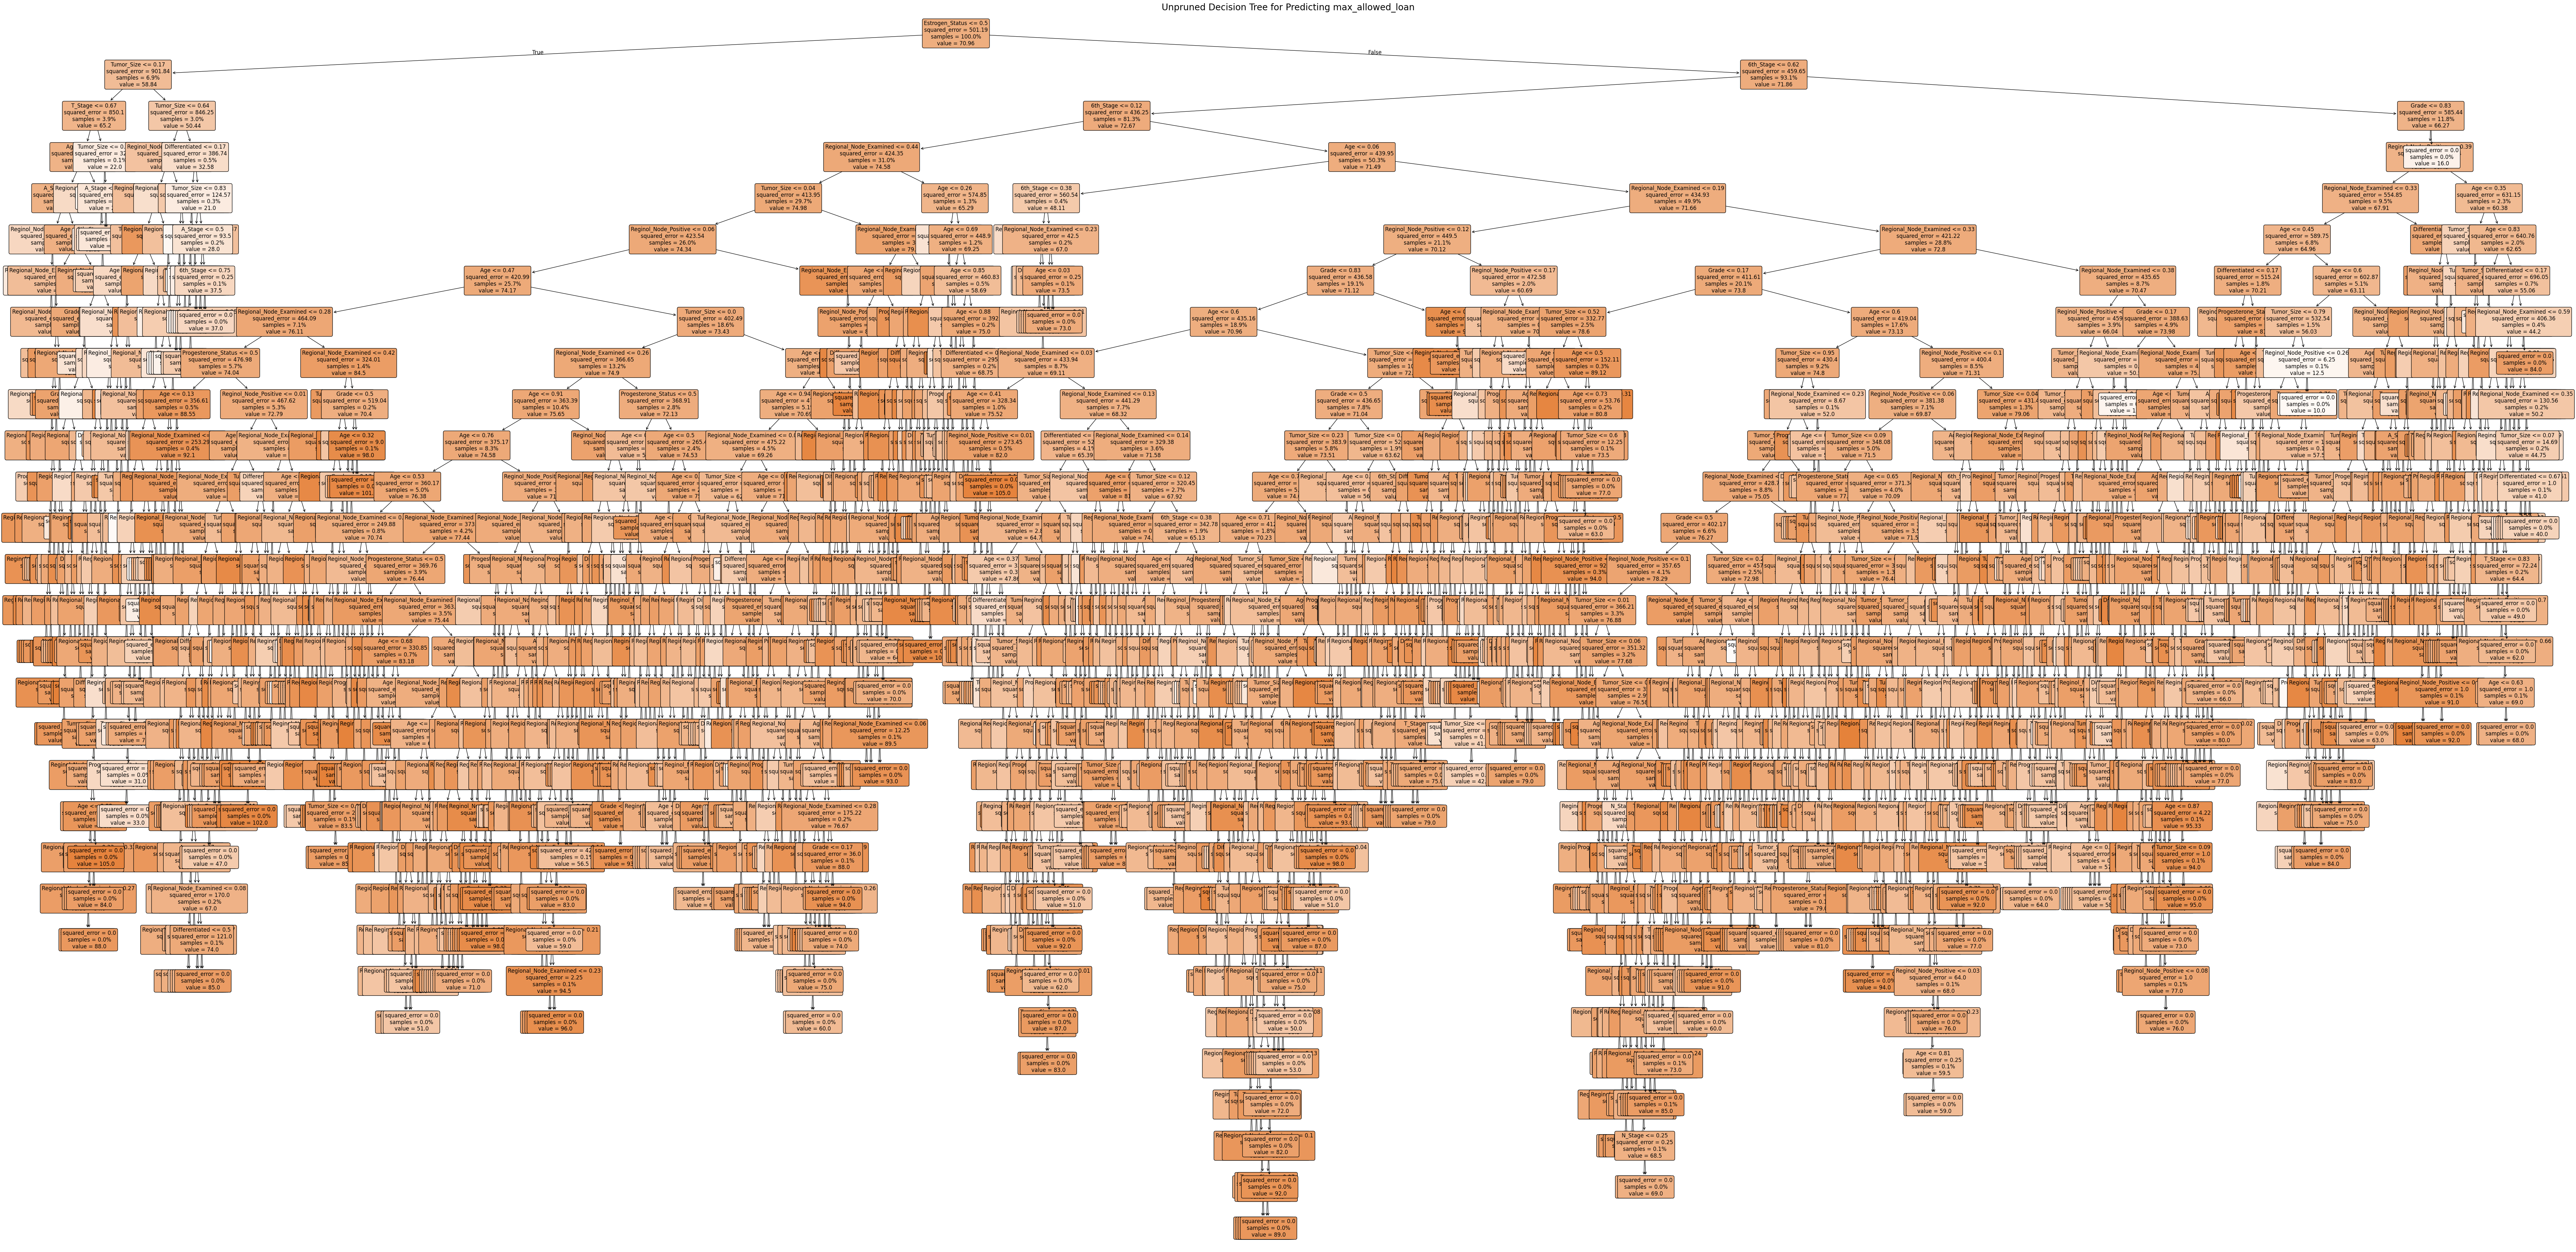

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set a large figure size to accommodate the deep tree
plt.figure(figsize=(100, 50))  # Adjust as needed

# Plot the unpruned regression tree
plot_tree(
    regressor,  # Your unpruned DecisionTreeRegressor object
    feature_names=list(X_train.columns),  # Feature names from the dataset
    filled=True,                          # Color-filled nodes
    rounded=True,                         # Rounded corners for aesthetics
    fontsize=12,                          # Larger font for readability
    proportion=True,                      # Show proportions of samples
    precision=2                           # Decimal precision for values
)

plt.title("Unpruned Decision Tree for Predicting max_allowed_loan", fontsize=20)
plt.show()





*   The depth of the fully grown tree
*  From tutorial 6 (week 6), page 14



In [ ]:
# Print the maximum depth of the decision tree model
print(regressor.tree_.max_depth)

29




*   Save the file
*   From tutorial 6 (week 6), page 15





*   Using the fit() method, train a pruned decision tree classifier, clf_pruned, on the training data subset then
use to perform predictions on the test set.
*   From tutorial 6 (week 6), page 15



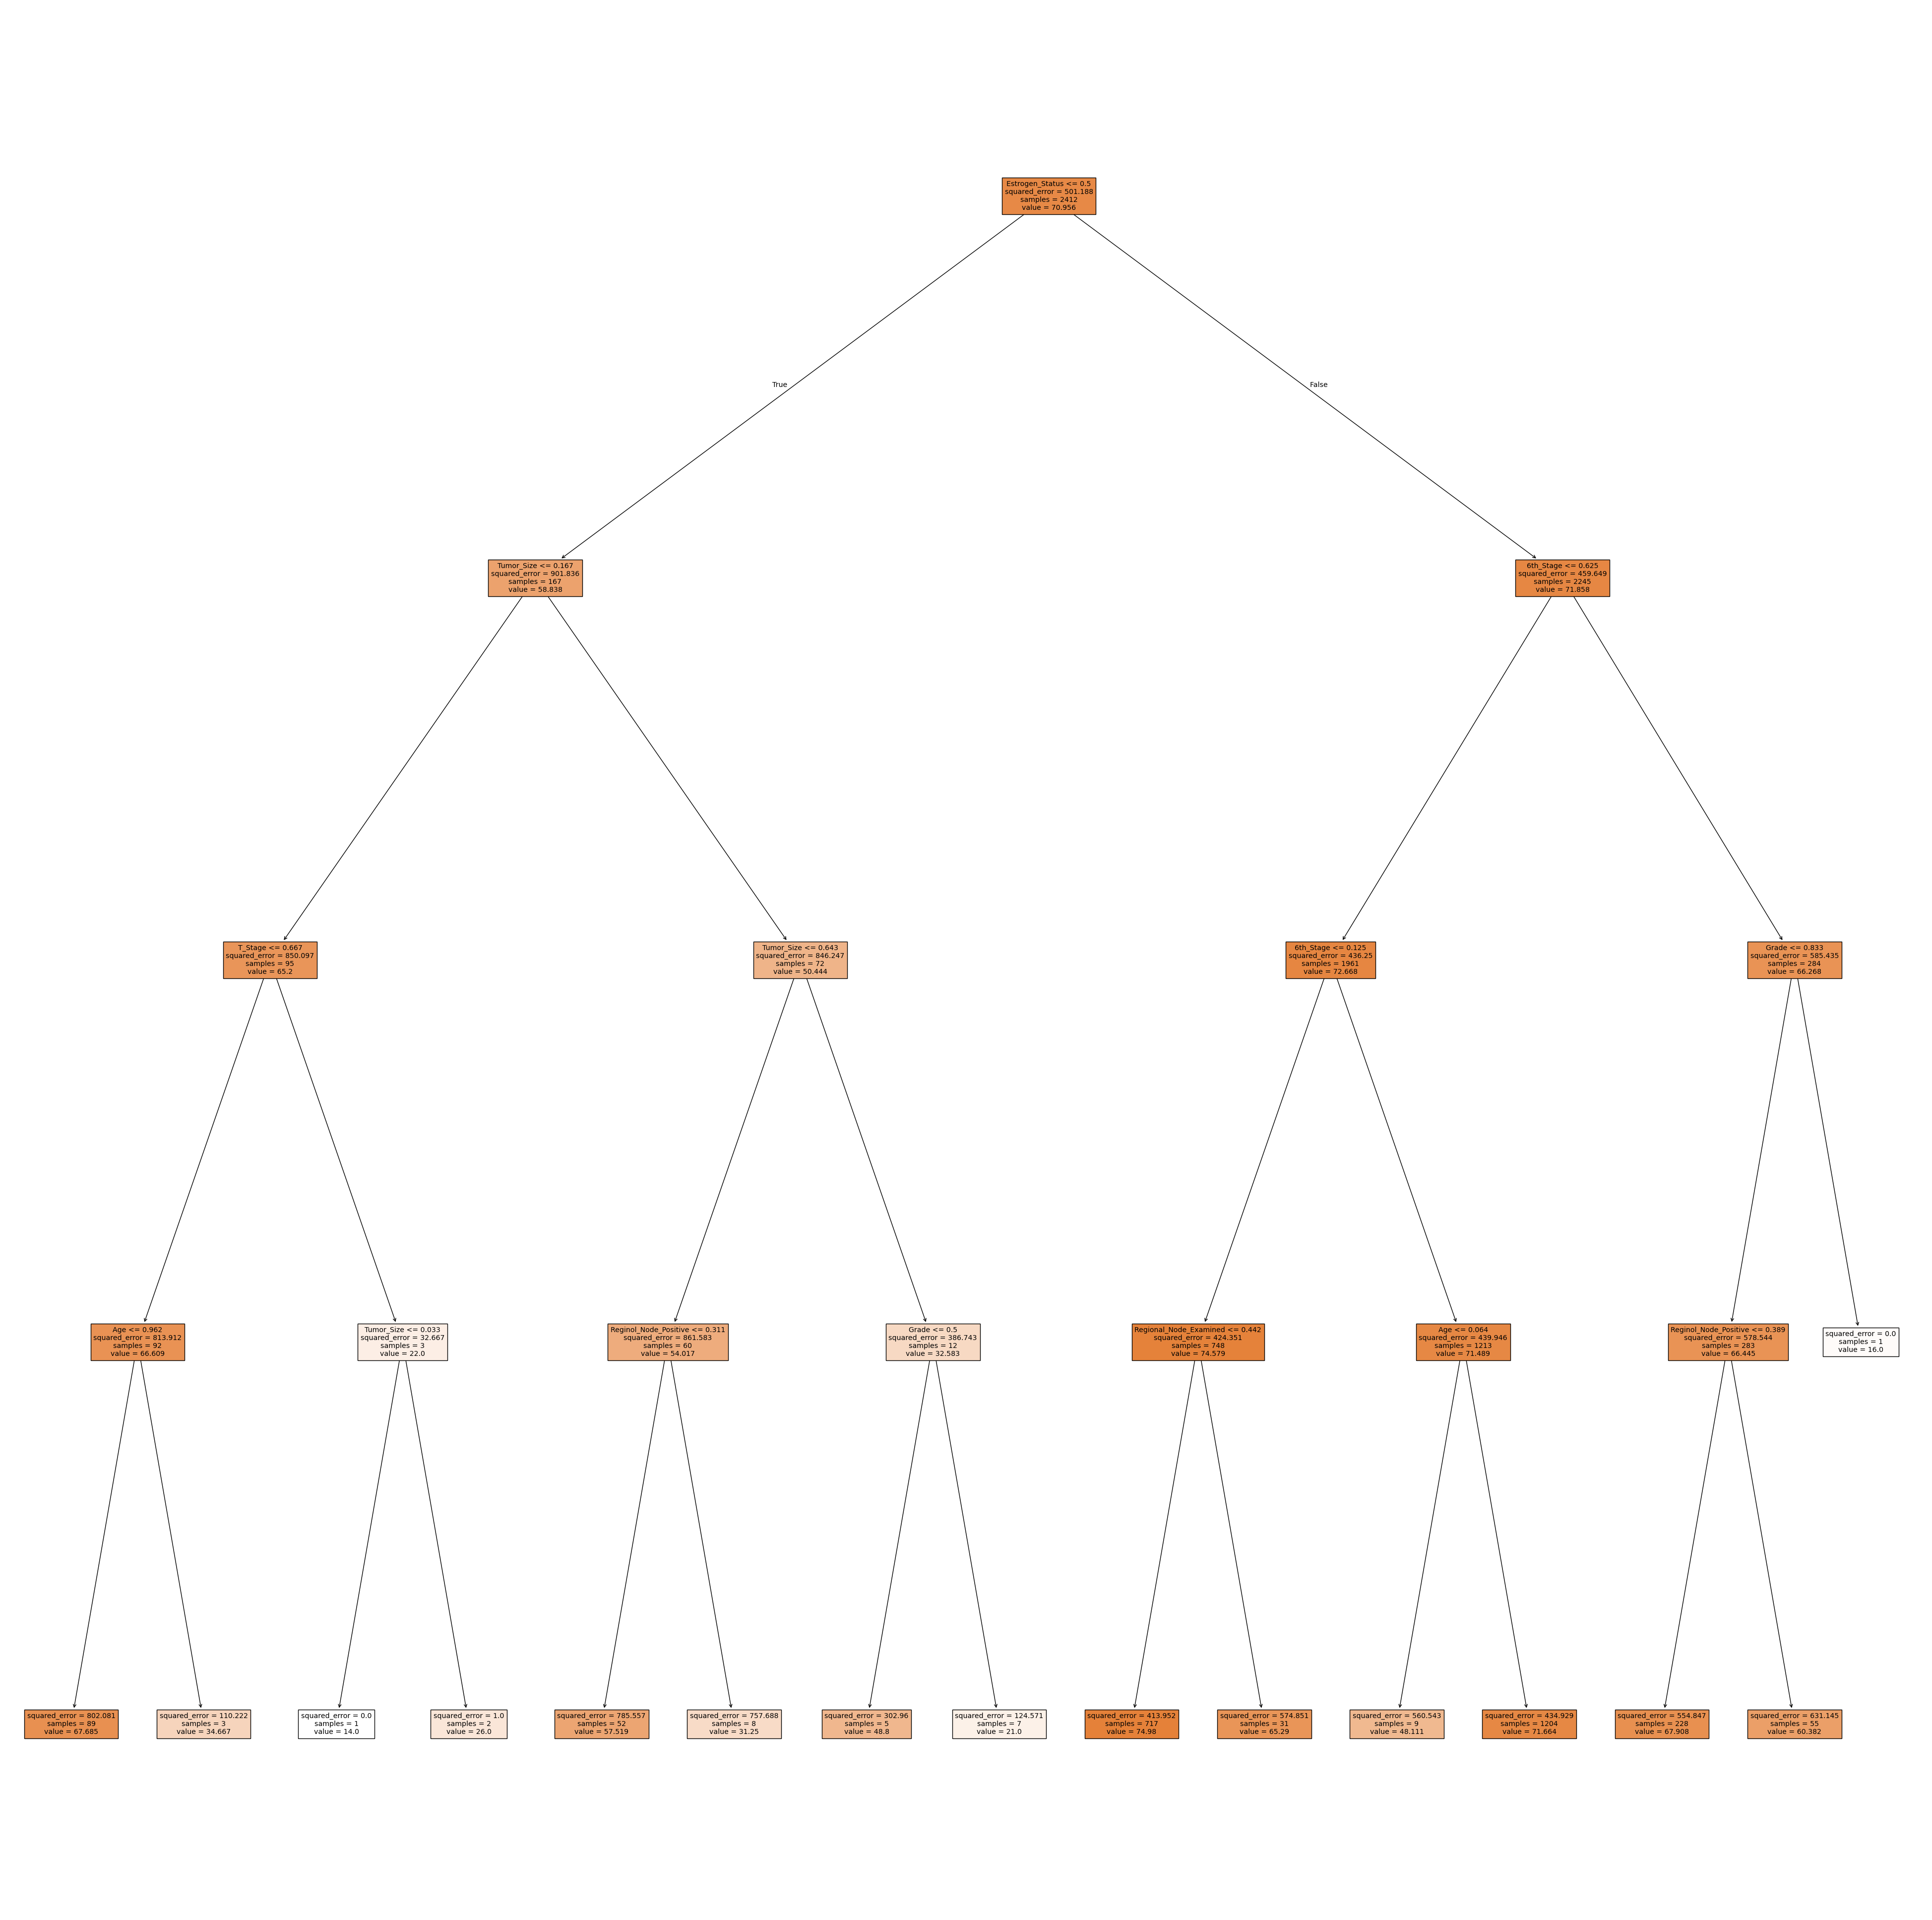

In [ ]:
# Limit the tree growth to 4 levels
pruned_regressor = DecisionTreeRegressor(max_depth=4)
pruned_regressor.fit(X_train, y_train)

# To make predictions on the test set, ues the predict method:
y_pred_pruned = pruned_regressor.predict(X_test)

# Plot the regression DT
pruned_Tree_model = plt.figure(figsize=(50,50))
pruned_Tree_model_Graph = tree.plot_tree(pruned_regressor, feature_names=list(X_train.columns), filled=True)

#To save the DT graph as a png image
pruned_Tree_model.savefig("pruned_reg_decision_tree.png")





*   Obtaining the regression metrics, Mean Absolute Error (MAE)
*   From tutorial 6 (week 6), page 20



In [ ]:
# Calculating the regression metrics for the fully grown regression decision Tree
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 25.331882255389722
Mean Squared Error: 1004.3782822001106
Root Mean Squared Error: 31.691927713537883
R2: -0.980666870061577




*   Obtaining the regression metrics, Mean Absolute Error (MAE)
*   From tutorial 6 (week 6), page 20



In [ ]:
# Calculating the regression metrics for the pruned regression decision Tree
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pruned))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pruned))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pruned)))
print('R2:', metrics.r2_score(y_test, y_pred_pruned))


Mean Absolute Error: 18.270050246230277
Mean Squared Error: 507.0160176742343
Root Mean Squared Error: 22.517016180529655
R2: 0.0001478062646620426




*   Using hyperparameter tuning with GridSearchCV will help estimate the best pruning hyperparameters.
*   From tutorial 6 (week 6), page 21



In [ ]:

#create new a Decision Tree model
regressor_optimise = DecisionTreeRegressor()

#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'max_depth': np.arange(1, 22), 'criterion': ['squared_error'], 'splitter':['best', 'random']}

#use gridsearch to test all values for n_neighbors
regressor_gscv = GridSearchCV(regressor_optimise, param_grid, cv=5, scoring = 'r2')

#fit model to data
regressor_gscv.fit(X, y)

#get the best parameters
regressor_gscv.best_params_


{'criterion': 'squared_error', 'max_depth': np.int64(3), 'splitter': 'random'}



*   Retrain the decision tree regressor with the new hyperparameters
*   From tutorial 6 (week 6), page 21



In [ ]:

# Create Decision Tree classifer object
regressor_optimal = DecisionTreeRegressor(max_depth = 16, criterion = "squared_error", splitter = 'best')

# Train Decision Tree Classifer
regressor_optimal = regressor_optimal.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_regressor_optimal = regressor_optimal.predict(X_test)

#print the new performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_regressor_optimal))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_regressor_optimal))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_regressor_optimal)))
print('R2:', metrics.r2_score(y_test, y_pred_regressor_optimal))


Mean Absolute Error: 23.404127851597636
Mean Squared Error: 873.3989719914149
Root Mean Squared Error: 29.55332421220014
R2: -0.722371380213267
